In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_2015=pd.read_csv("Resources/2015.csv")
data_2016=pd.read_csv("Resources/2016.csv")
data_2017=pd.read_csv("Resources/2017.csv")


In [51]:
df=data_2016[["Country","Happiness Score"]]
df=df.replace("United States", "United States of America")

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd



shapefile="Resources/countries.shp"

colors = 9
cmap = 'Blues'
figsize = (16, 12)
year = '2016'
cols = ['Country Name', 'Country Code', year]


In [41]:
shapefile="Resources/countries"


gdf = gpd.read_file(shapefile)
gdf_short=gdf[["SOVEREIGNT", "geometry"]]


,SOVEREIGNT,geometry
0,Indonesia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Peru,(POLYGON ((-69.51008875199994 -17.506588197999...
5,Argentina,(POLYGON ((-67.28475055533852 -23.834137122456...
6,United Kingdom,"POLYGON ((33.78093509200005 34.97634511900009,..."
7,Cyprus,(POLYGON ((33.78183027400007 34.97622304900005...
8,India,(POLYGON ((77.80034631400014 35.49540557900012...
9,China,(POLYGON ((78.91594777500006 33.38765598100011...


In [52]:
merged = gdf_short.merge(df, left_on='SOVEREIGNT', right_on='Country')
merged.loc[merged["Country"]=="United States of America"]

,SOVEREIGNT,geometry,Country,Happiness Score
158,United States of America,(POLYGON ((-95.16056921399991 49.3694941210001...,United States of America,7.104
159,United States of America,(POLYGON ((-169.5302628249999 16.7601992860000...,United States of America,7.104
160,United States of America,(POLYGON ((-64.55939693899995 17.7516136740000...,United States of America,7.104
161,United States of America,(POLYGON ((-67.85586503799993 18.1146914730000...,United States of America,7.104
162,United States of America,(POLYGON ((-170.5910131499999 -14.264825127999...,United States of America,7.104
163,United States of America,"POLYGON ((144.886403842 13.64020416900007, 144...",United States of America,7.104
164,United States of America,"(POLYGON ((145.20573978 14.18138255400004, 145...",United States of America,7.104


Text(0.5, 1.0, '2016 Happiness Scores')

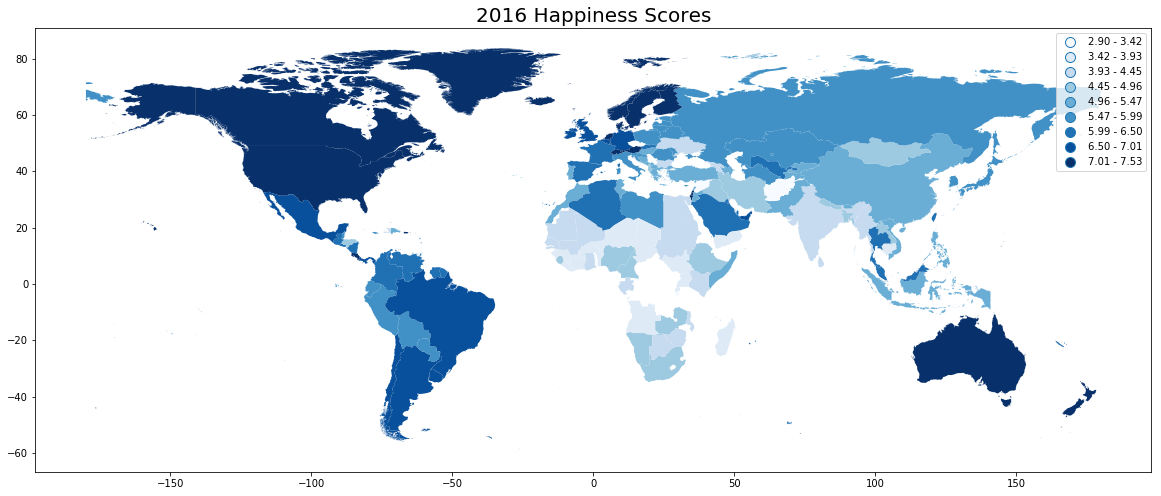

In [72]:
figsize = (20, 20)
ax=merged.dropna().plot(column="Happiness Score", cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
plt.title(title, fontdict={'fontsize': 20}, loc='center')




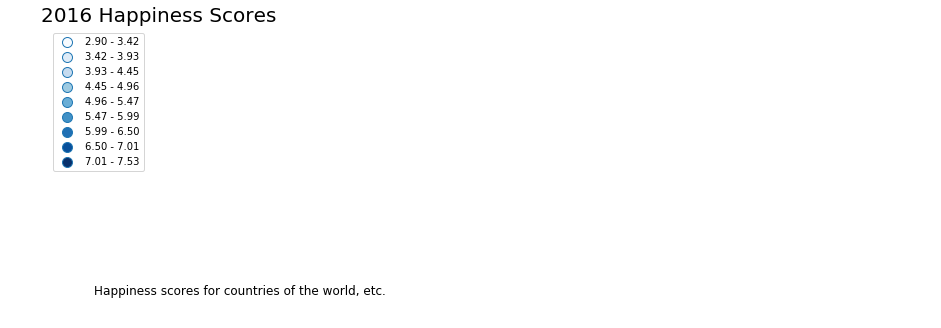

In [61]:
ax=merged.dropna().plot(column="Happiness Score", cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
title="2016 Happiness Scores"
description="Happiness scores for countries of the world, etc."

merged[merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

